# **Home Loan Default Prediction**


-------------------------------------------------
## Context
-------------------------------------------------

A major proportion of retail bank profit comes from interests in the form of home loans. These loans are borrowed by regular income/high-earning customers. Banks are most fearful of defaulters, as bad loans (NPA) usually eat up a major chunk of their profits. Therefore, it is important for banks to be judicious while approving loans for their customer base.
The approval process for the loans is multifaceted. Through this process, the bank tries to check the creditworthiness of the applicant on the basis of a manual study of various aspects of the application. The entire process is not only effort-intensive but also prone to wrong judgment/approval owing to human error and biases.
There have been attempts by many banks to automate this process by using heuristics. But with the advent of data science and machine learning, the focus has shifted to building machines that can learn this approval process and make it free of biases and more efficient. At the same time, one important thing to keep in mind is to make sure that the machine does not learn the biases that previously crept in because of the human approval process.

------------------------------------
## Objective
------------------------------

Build a classification model to predict clients who are likely to default on their loan and give recommendations to the bank on the important features to consider while approving a loan.



-------------------------------------
## **Data Description:**
-------------------------------------
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

### **Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [2]:
hm=pd.read_csv("hmeq.csv")

In [3]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

### **Print the first and last 5 rows of the dataset**

In [4]:
# Display first five rows
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [5]:
# Display last 5 rows
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


### **Understand the shape of the dataset**

In [6]:
# Check the shape of the data
shape = data.shape
shape

(5960, 13)

* The dataset contains **5960 rows** and **13 columns**.

### **Check the data types of the columns**

In [7]:
# Check info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Observation:**
* `REASON` and `JOB` are of object type while the rest are numeric in nature.
* **BAD** is the target variable.
* There are null values in the dataset.

### **Check for missing values**

In [8]:
# Analyse missing values - Hint: use isnull() function
null_count = data.isnull().sum()
null_count

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [9]:
# Check the percentage of missing values in the each column.
# Hint: divide the result from the previous code by the number of rows in the dataset
null_percent = (null_count / shape[0]) * 100
null_percent

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

**Observation:**
* Every columns except **BAD** and **LOAN** columns contains null values.
* **DEBTINC** column has the highest null value percentage of 21.26%.

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

### **Convert the data types**

In [10]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

In [11]:
cols

['REASON', 'JOB', 'BAD']

In [12]:
# Changing the data type of object type column to category. hint use astype() function

for i in cols:
    data[i] = data[i].astype('category')

In [13]:
# Checking the info again and the datatype of different variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Analyze Summary Statistics of the dataset**

In [14]:
# Analyze the summary statistics for numerical variables
num_cols = data.select_dtypes('number').columns
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000
DEBTINC,4693.0,33.779915,8.601746,0.524499,29.140031,34.818262,39.003141,203.312149


**Observation:**
* The loan amount varies from 1100 to 89900 with 75% of the loan approved is under 23300.
* The minimum mortgage due is 2063 and maximum is 399550 with a mean of 73760.
* The current value of the property ranges from 8000 tot 855909.
* Almost 75% of the loan applicants are in the same job for 13 years.

In [15]:
# Check summary for categorical data - Hint: inside describe function you can use the argument include=['category']
data.describe(include = ['category']).T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


**Observation:**
* The **BAD** variable has 2 unique values **(0,1)** and 0 has the highest frequency of 4771.
* Debt consolidation is highest number of reason provided by the loan applicants.
* There are 6 unique values in **JOB** column and **other** has the highest frequency of 2388.

**Let's look at the unique values in all the categorical variables**

In [16]:
# Checking the count of unique values in each categorical column 
cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('*'*40)

Unique values in BAD are :
0    4771
1    1189
Name: BAD, dtype: int64
****************************************
Unique values in REASON are :
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
****************************************
Unique values in JOB are :
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64
****************************************


**Observation:**
* The unique values in **BAD** shows that 1189 client have defaulted on loan.
* **REASON** has 2 unique values in which 3928 clients gave debt consolidation as reason and 1780 clients gave home improvement as reason.
* **JOB** has 6 unique values in which Other has the highest frequency followed by ProfExe, Office, Mgr, Self, Sales.

In [17]:
# Checking the precentage of unique values in each categorical column
cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print((data[i].value_counts(normalize = True)) * 100) 
    print('*'*40)

Unique values in BAD are :
0    80.050336
1    19.949664
Name: BAD, dtype: float64
****************************************
Unique values in REASON are :
DebtCon    68.815697
HomeImp    31.184303
Name: REASON, dtype: float64
****************************************
Unique values in JOB are :
Other      42.034853
ProfExe    22.460834
Office     16.687203
Mgr        13.501144
Self        3.397289
Sales       1.918676
Name: JOB, dtype: float64
****************************************


**Observation:**
* 80% of clients repaid their loan on time and 20% defaulted on loan.
* 69% of clients bought loan for debt consolidation and 31% of clients bought loan for home improvement.
* The other job category has the highest frequency with 42%.

## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [18]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.nanmedian(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

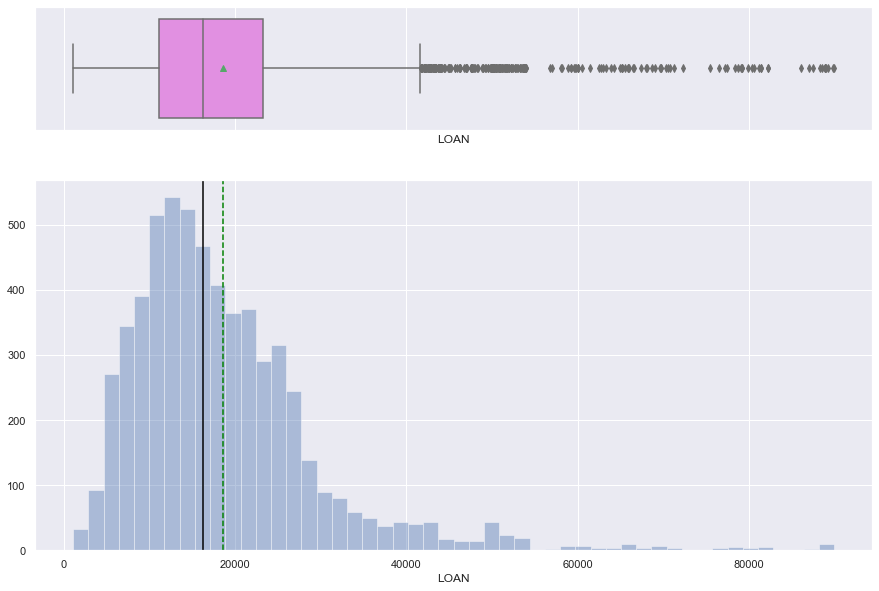

In [19]:
# Build the histogram boxplot for LOAN
histogram_boxplot(data['LOAN'])

* The distribution is right skewed with very few clients getting loan more than 40000.


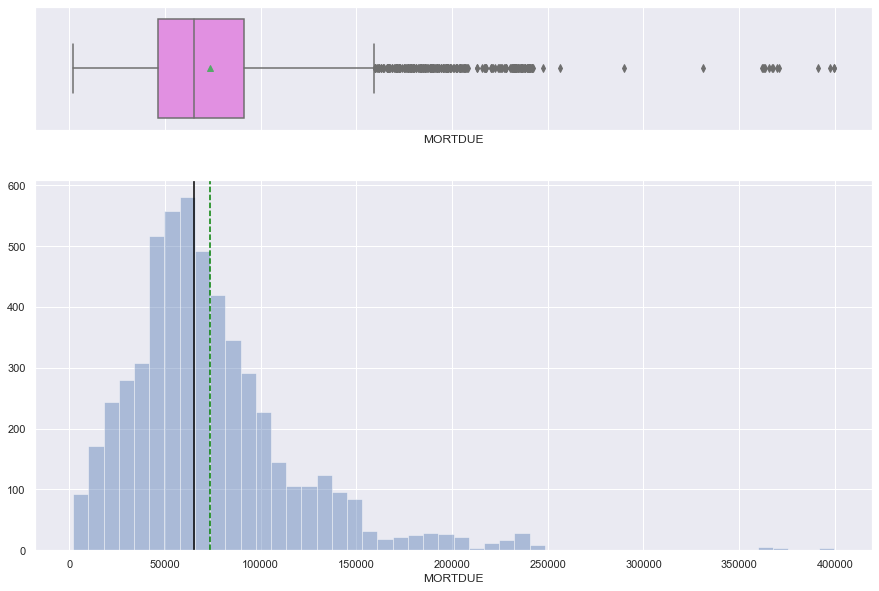

In [20]:
# Build the histogram boxplot for MORTDUE
histogram_boxplot(data['MORTDUE'])

* The distribution is right skewed and around 75% of clients mortgage due is under ~91500.

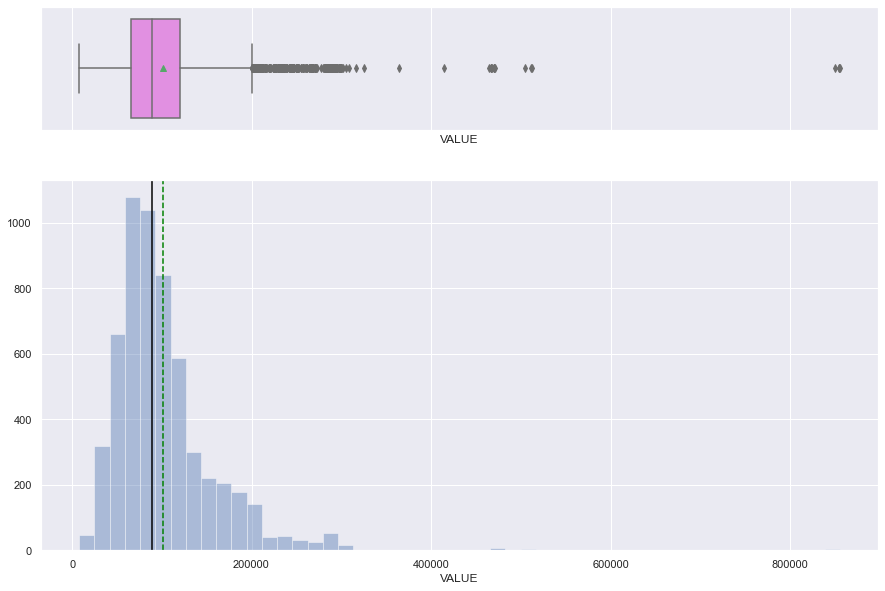

In [21]:
# Build the histogram boxplot for VALUE
histogram_boxplot(data['VALUE'])

* The current value of the property is also right right skewed and there are few outliers with maximum value of 855909.

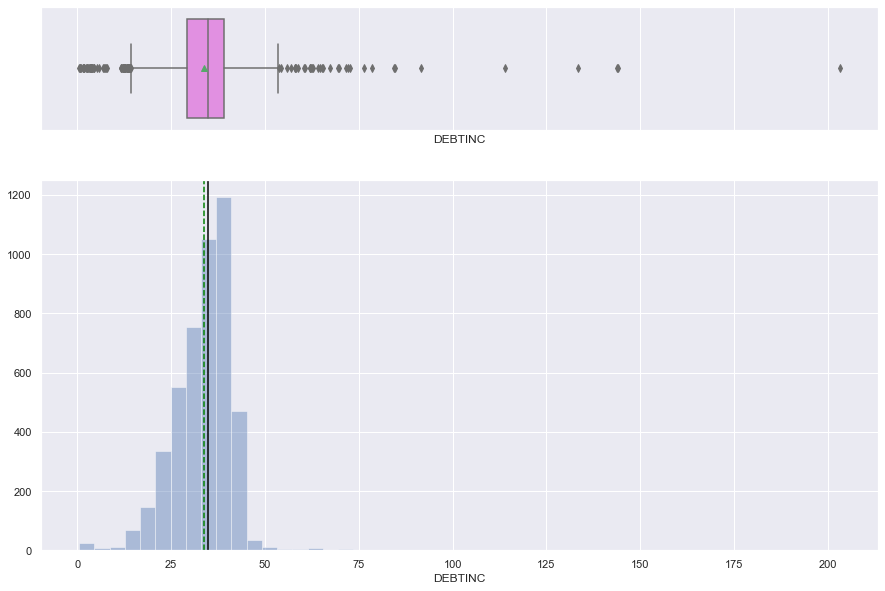

In [22]:
# Build the histogram boxplot for DEBTINC
histogram_boxplot(data['DEBTINC'])

* Debt to income ratio is also right skewed and it has very few outliers with a maximum value of ~200.

### **2. Univariate Analysis - Categorical Data**

In [23]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

#### Analyze Barplot for DELINQ

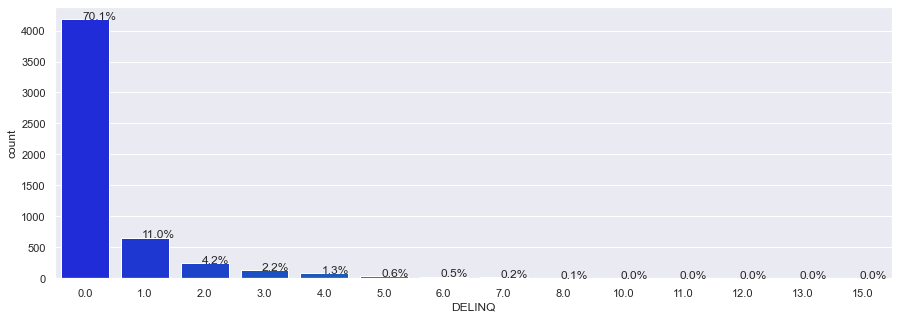

In [24]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

* 70% of the client have 0 delinquent credit lines followed by 11% with 1 delinquent credit lines.

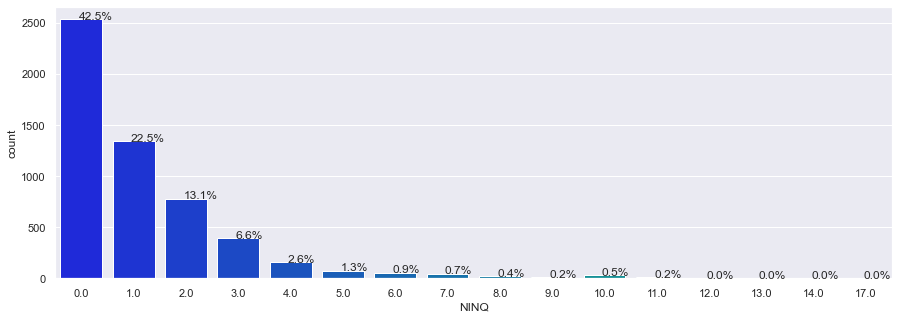

In [25]:
#Build barplot for NINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(data["NINQ"],palette='winter')
perc_on_bar(ax,data["NINQ"])

* The number of recent credit inquiries varies from 0 to 10, 0 has the highest percentage of 42.5% and 1 has the next highest with 22.5%.

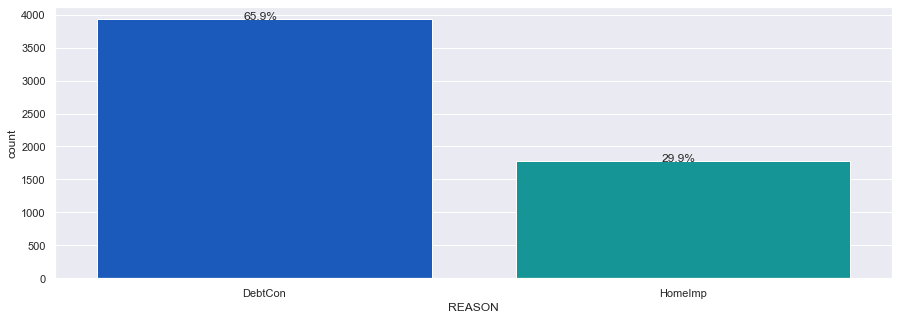

In [26]:
#Build barplot for REASON

plt.figure(figsize=(15,5))
ax = sns.countplot(data["REASON"],palette='winter')
perc_on_bar(ax,data["REASON"])

* There are two categories in **REASON** column, debt consolidation has highest frequency of 65.9%.

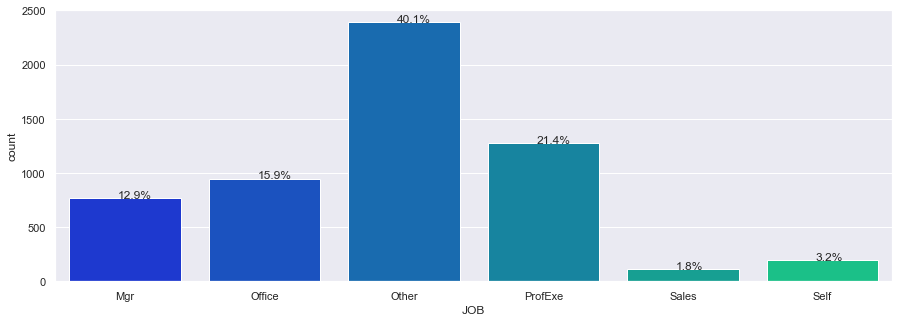

In [27]:
#Build barplot for JOB

plt.figure(figsize=(15,5))
ax = sns.countplot(data["JOB"],palette='winter')
perc_on_bar(ax,data["JOB"])

* There are 6 categories in **JOB** column with other category having highest number of occurances of 40.1% followed by ProExe with 21.4%.

## **Bivariate Analysis**

### **Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs LOAN

<AxesSubplot:xlabel='BAD', ylabel='LOAN'>

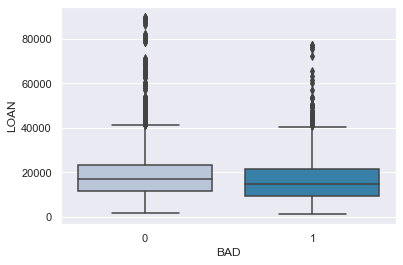

In [28]:
sns.boxplot(data["BAD"],data['LOAN'],palette="PuBu")

* The median value of clients defaulted is slightly lower than the clients not defaulted.
* Clients with loan amount less than ~20000 have the highest number of loan defaults.

#### Analyze BAD vs MORTDUE

<AxesSubplot:xlabel='BAD', ylabel='MORTDUE'>

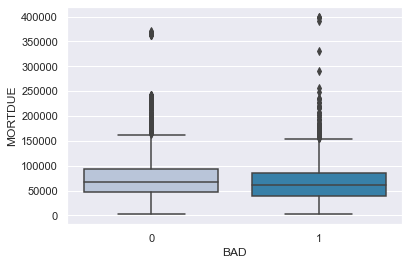

In [29]:
sns.boxplot(data["BAD"],data['MORTDUE'],palette="PuBu")

* Clients with mortgage due less than 100000 have most like defaulted and very few clients with mortgage due more than 200000 have defaulted.

#### Analyze BAD vs VALUE

<AxesSubplot:xlabel='BAD', ylabel='VALUE'>

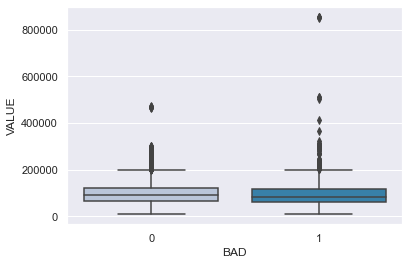

In [30]:
sns.boxplot(data["BAD"],data['VALUE'],palette="PuBu")

* The current value of most properties are between 50000 to 100000 and the clients who have defaulted and not defaulted are almost similar based on the value of the property.

### **Bivariate Analysis: Two Continuous Variables**

#### Analyze VALUE vs MORTDUE

<AxesSubplot:xlabel='VALUE', ylabel='MORTDUE'>

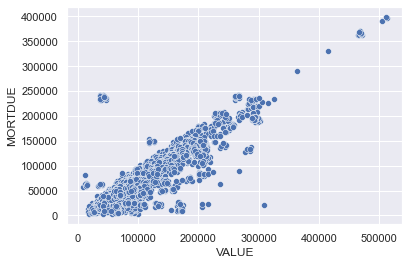

In [31]:
sns.scatterplot(data["VALUE"],data['MORTDUE'],palette="PuBu")

* We can clearly see that the mortgage due increases as the value of the property increases, both mortgage due and value are direclty proportional.

#### Analyze VALUE vs LOAN


<AxesSubplot:xlabel='VALUE', ylabel='LOAN'>

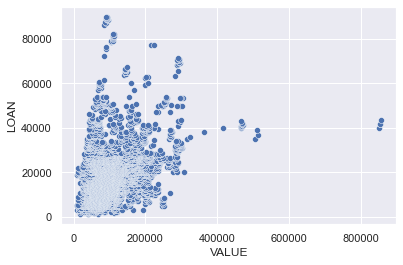

In [32]:
sns.scatterplot(data["VALUE"],data['LOAN'],palette="PuBu")

* The loan amount is provided based on the current value of the property, the loan amount increases as the value of the property increases.

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [33]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for BAD and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


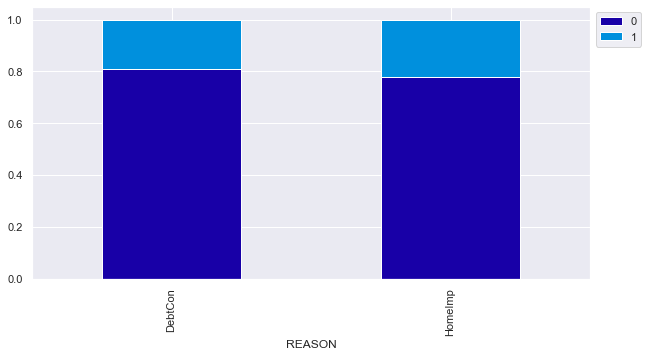

In [34]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

* The clients who have bought loan for home improvement have more number of loan defaults.

#### Plot stacked bar plot for BAD and JOB

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


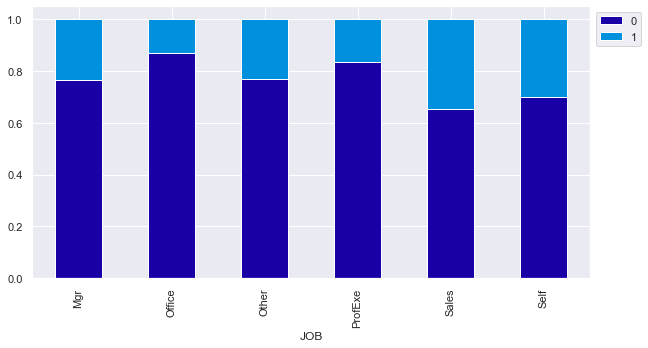

In [35]:
# Plot stacked bar plot for BAD and JOB
stacked_plot(data['JOB'])

* Clients in the sales job category has highest number of loan defaults followed by clients in self job category.

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

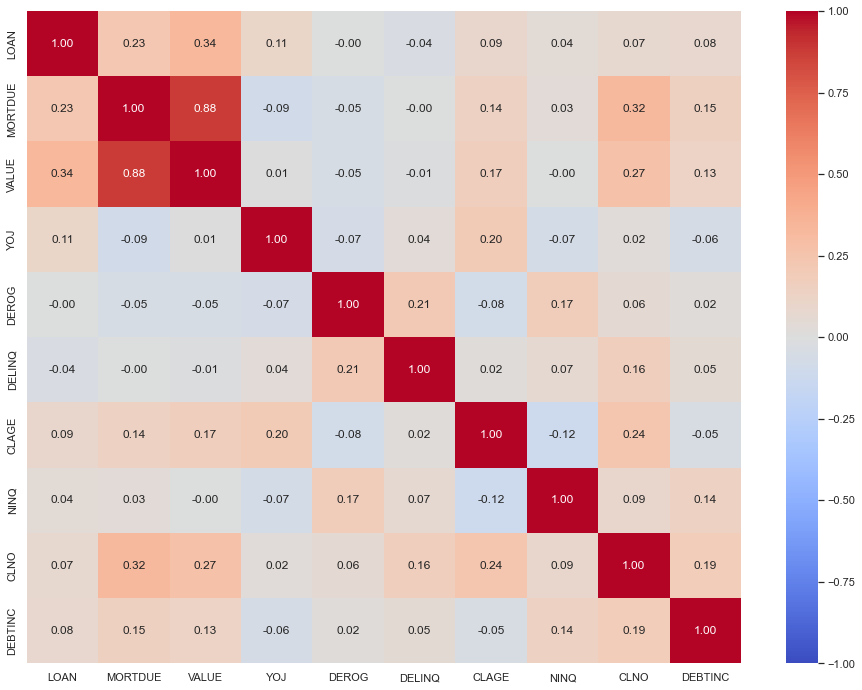

In [36]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns

corr = data[numerical_col].corr()

# plot the heatmap

plt.figure(figsize=(16,12))
sns.heatmap(corr,annot = True,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

* There is a positive correlation between mortgage due and number of existing credit line, this makes sense as the numbers credit increases the mortgage due also increases.
* Loan amount and value of the property also has positive correlation, this means that the loan amount approved is based on the current value of the property.
* Debt to income ratio has a weak positive correlation with the number of existing credit line.

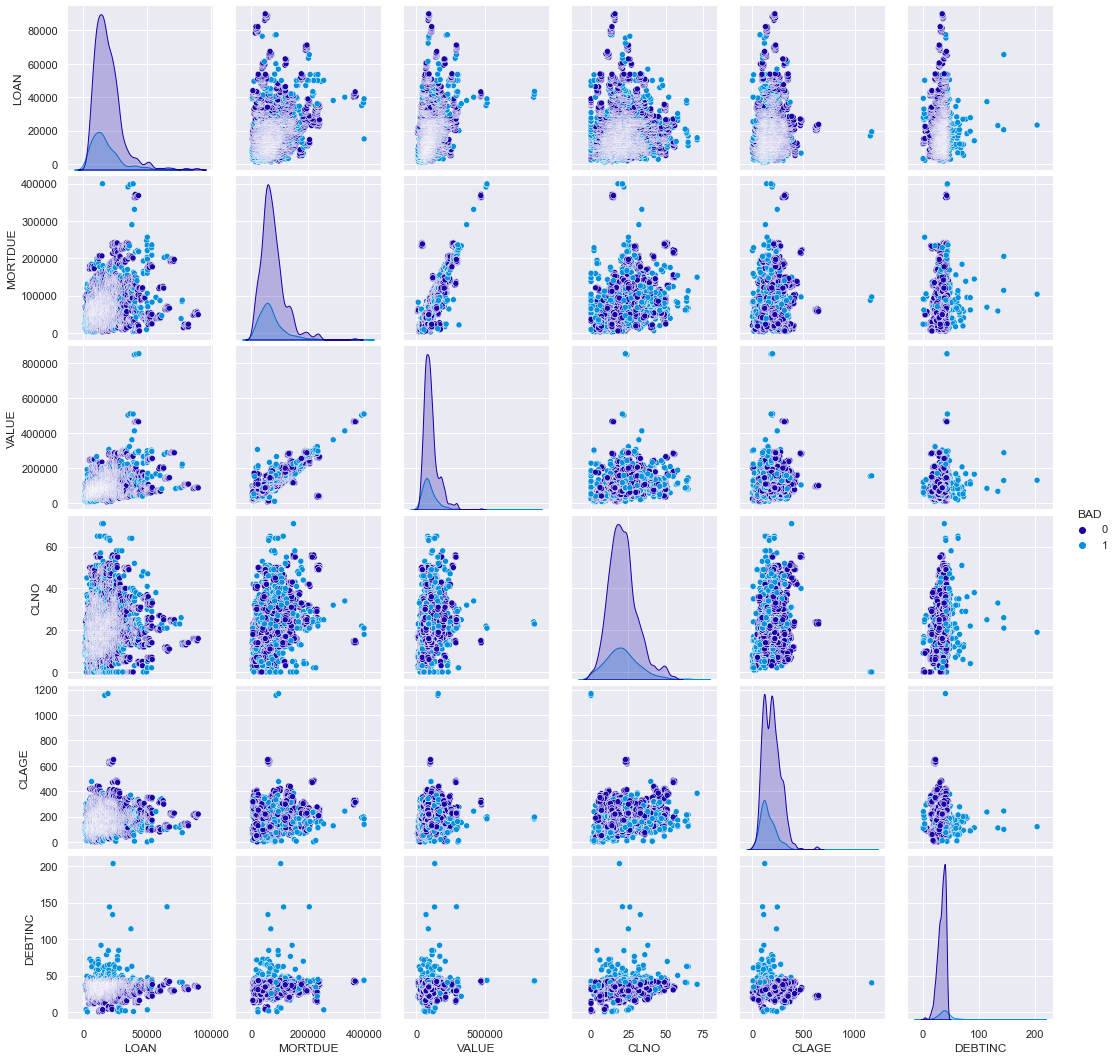

In [37]:
# Build pairplot for the data with hue = 'BAD'
sns.pairplot(data = data, vars = ['LOAN', 'MORTDUE', 'VALUE', 'CLNO', 'CLAGE', 'DEBTINC'], hue = 'BAD')
plt.show()

#### Treating Outliers

In [38]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1 = df[col].quantile(0.25) # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1   # IQR Range
    Lower_Whisker = Q1 - 1.5 * IQR  #define lower whisker
    Upper_Whisker = Q3 + 1.5 * IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

In [39]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

In [40]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,0.0,14.0,NaN
2,1,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,41600.0,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,41600.0,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,41600.0,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,41600.0,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


#### Adding new columns in the dataset for each column which has missing values 

In [41]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [42]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)    

#### Filling missing values in numerical columns with median and mode in categorical variables

In [43]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('category').columns.tolist()

# Fill numeric columns with median.
df[num_data.columns] = df[num_data.columns].fillna(df[num_data.columns].median())

# Fill object columns with mode.
for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)

## **Data Preparation**

### Removing binary flag columns from the dataframe

In [44]:
# Create a list of columns to be dropped
drop_columns = ['MORTDUE_missing_values_flag', 'VALUE_missing_values_flag', 'REASON_missing_values_flag',
               'JOB_missing_values_flag', 'YOJ_missing_values_flag', 'DEROG_missing_values_flag',
               'DELINQ_missing_values_flag', 'CLAGE_missing_values_flag', 'NINQ_missing_values_flag',
               'CLNO_missing_values_flag', 'DEBTINC_missing_values_flag']

# Drop the columns and copy it to a new dataframe
data1 = df.drop(columns = drop_columns)

### **Separating the target variable from other variables**

In [45]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
X = data1.drop(columns = 'BAD')

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
X = pd.get_dummies(X, drop_first = True)

# Create y(dependent varibale)
Y = data1['BAD']

### **Splitting the data into 70% train and 30% test set**

In [46]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 7)

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why. 

In [47]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Eligible', 'Not Eligible'], yticklabels=['Eligible', 'Not Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Logistic Regression Model** 

In [48]:
# Defining the Logistic regression model
lg = LogisticRegression()

# Fitting the model on the training data 
lg.fit(X_train,y_train)

LogisticRegression()

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3338
           1       0.00      0.00      0.00       834

    accuracy                           0.80      4172
   macro avg       0.40      0.50      0.44      4172
weighted avg       0.64      0.80      0.71      4172



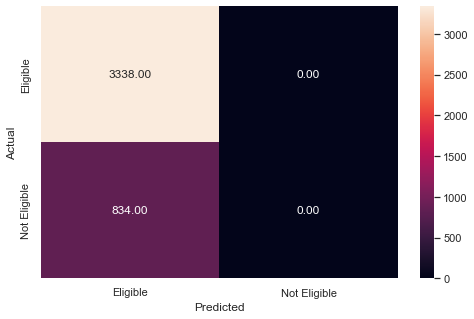

In [49]:
#Predict for train set
y_pred_train1 = lg.predict(X_train)

#checking the performance on the train dataset
metrics_score(y_train, y_pred_train1)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1433
           1       0.00      0.00      0.00       355

    accuracy                           0.80      1788
   macro avg       0.40      0.50      0.44      1788
weighted avg       0.64      0.80      0.71      1788



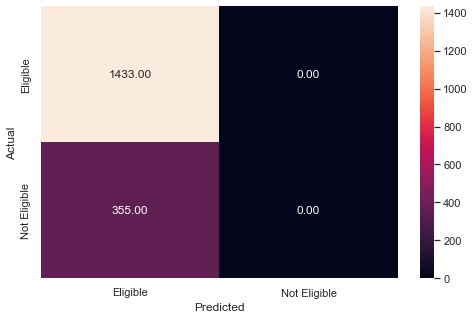

In [50]:
#Predict for test set
y_pred_test1 = lg.predict(X_test)

#checking the performance on the test dataset
metrics_score(y_test, y_pred_test1)

**Observations:**
* There is an accurary of about 90% on both the train and test dataset.
* The recall is almost 0% for both the train and test dataset.
* Since the recall is very low this model is not good in predicting the loan defaults by the clients.

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [51]:
# Printing the coefficients of logistic regression
cols = X.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

,0
NINQ,0.000061
JOB_Self,0.000004
VALUE,0.000002
JOB_Sales,0.000002
DEROG,0.000000
DELINQ,0.000000
JOB_ProfExe,-0.000004
MORTDUE,-0.000004
REASON_HomeImp,-0.000006
JOB_Other,-0.000008


**Observation:**
#### Features that positively affect the loan default are:
* NINQ	 
* DEBTINC	 
* CLNO	 
* JOB_Self	
* JOB_Sales	
* REASON_HomeImp              
* DEROG            
* DELINQ            

#### Features that negatively affect the loan default are:
* VALUE	             
* MORTDUE	           
* LOAN	          
* JOB_ProfExe	         
* JOB_Other             
* JOB_Office            
* CLAGE	         
* YOJ	      


### **Build a Decision Tree Model**

#### Data Preparation for the tree based model

In [52]:
# Add binary flags
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df


# List of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data,colmn)
    

In [53]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data = data.select_dtypes('category').columns.tolist()

# Fill numeric columns with median.
data[num_data.columns] = data[num_data.columns].fillna(data[num_data.columns].median())

# Fill object columns with model.
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)

**Removing binary flag columns from the data**

In [54]:
# Create a list of columns to be dropped
drop_columns = ['MORTDUE_missing_values_flag', 'VALUE_missing_values_flag', 'REASON_missing_values_flag',
               'JOB_missing_values_flag', 'YOJ_missing_values_flag', 'DEROG_missing_values_flag',
               'DELINQ_missing_values_flag', 'CLAGE_missing_values_flag', 'NINQ_missing_values_flag',
               'CLNO_missing_values_flag', 'DEBTINC_missing_values_flag']

# Drop the columns and copy it to a new dataframe
data = data.drop(columns = drop_columns)

#### Separating the target variable y and independent variable x

In [55]:
# Drop dependent variable from dataframe and create the X(independent variable) matrix
X = data.drop(columns = 'BAD')

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
X = pd.get_dummies(X, drop_first = True)

# Create y(dependent varibale)
Y = data['BAD']

#### Split the data

In [56]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 7)

In [57]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
d_tree = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.2, 1: 0.8})

In [58]:
#fitting Decision tree model
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=7)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3338
           1       1.00      1.00      1.00       834

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



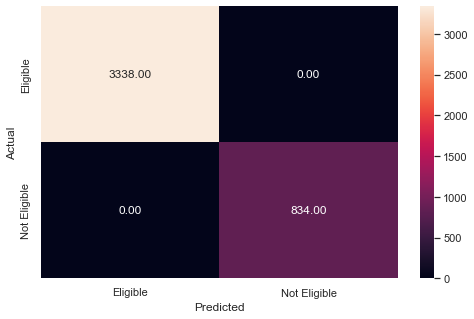

In [59]:
# Checking performance on the training data
y_pred_train2 = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train2)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1433
           1       0.66      0.56      0.61       355

    accuracy                           0.86      1788
   macro avg       0.78      0.74      0.76      1788
weighted avg       0.85      0.86      0.85      1788



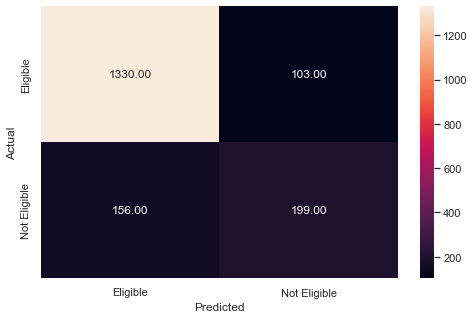

In [60]:
# Checking performance on the testing data
y_pred_test2 = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test2)

**Observation:**
* The accuracy for train dataset is 100% and test dataset is 86%.
* The recall for test dataset for predicting positive case is 56%.
* The train dataset has a perfect score 100% but the scores for test dataset is very low which means the model is overfitting on the train dataset.

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


#### Using GridSearchCV for Hyperparameter tuning on the model

In [61]:
# Choose the type of classifier. 
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.2, 1: 0.8})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

# Fit the GridSearch on train dataset
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=9,
                       min_samples_leaf=20, random_state=7)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.97      0.85      0.90      3338
           1       0.59      0.88      0.71       834

    accuracy                           0.85      4172
   macro avg       0.78      0.87      0.80      4172
weighted avg       0.89      0.85      0.86      4172



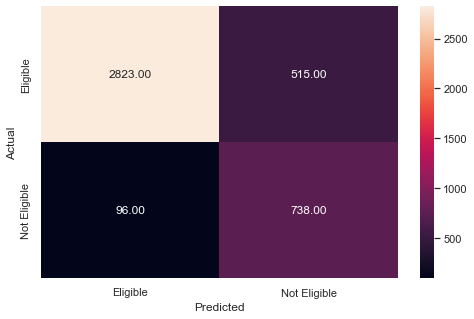

In [62]:
# Checking performance on the training data based on the tuned model
y_pred_train3 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train3)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1433
           1       0.54      0.79      0.64       355

    accuracy                           0.83      1788
   macro avg       0.74      0.81      0.76      1788
weighted avg       0.86      0.83      0.84      1788



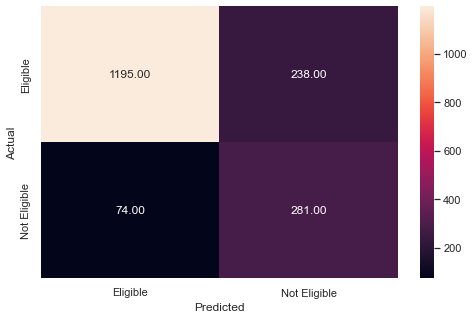

In [63]:
# Checking performance on the testing data based on the tuned model
y_pred_test3 = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test3)

**Observation:**
* The accuracy of the training data model is 84% and testing data model is 82%, which is almost similar and the model is not overfitting and is perfoming good.
* The recall for the test data is also increased to 79%.

#### Plotting the Decision Tree

**It is hard to visualize and interpret the tree with depth = 9, We can reduce the depth to 3 and visualize it**

In [64]:
tree_model = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, max_depth = 3,
                       min_samples_leaf = 5, random_state = 7)

# Fit the best algorithm to the data
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=3,
                       min_samples_leaf=5, random_state=7)

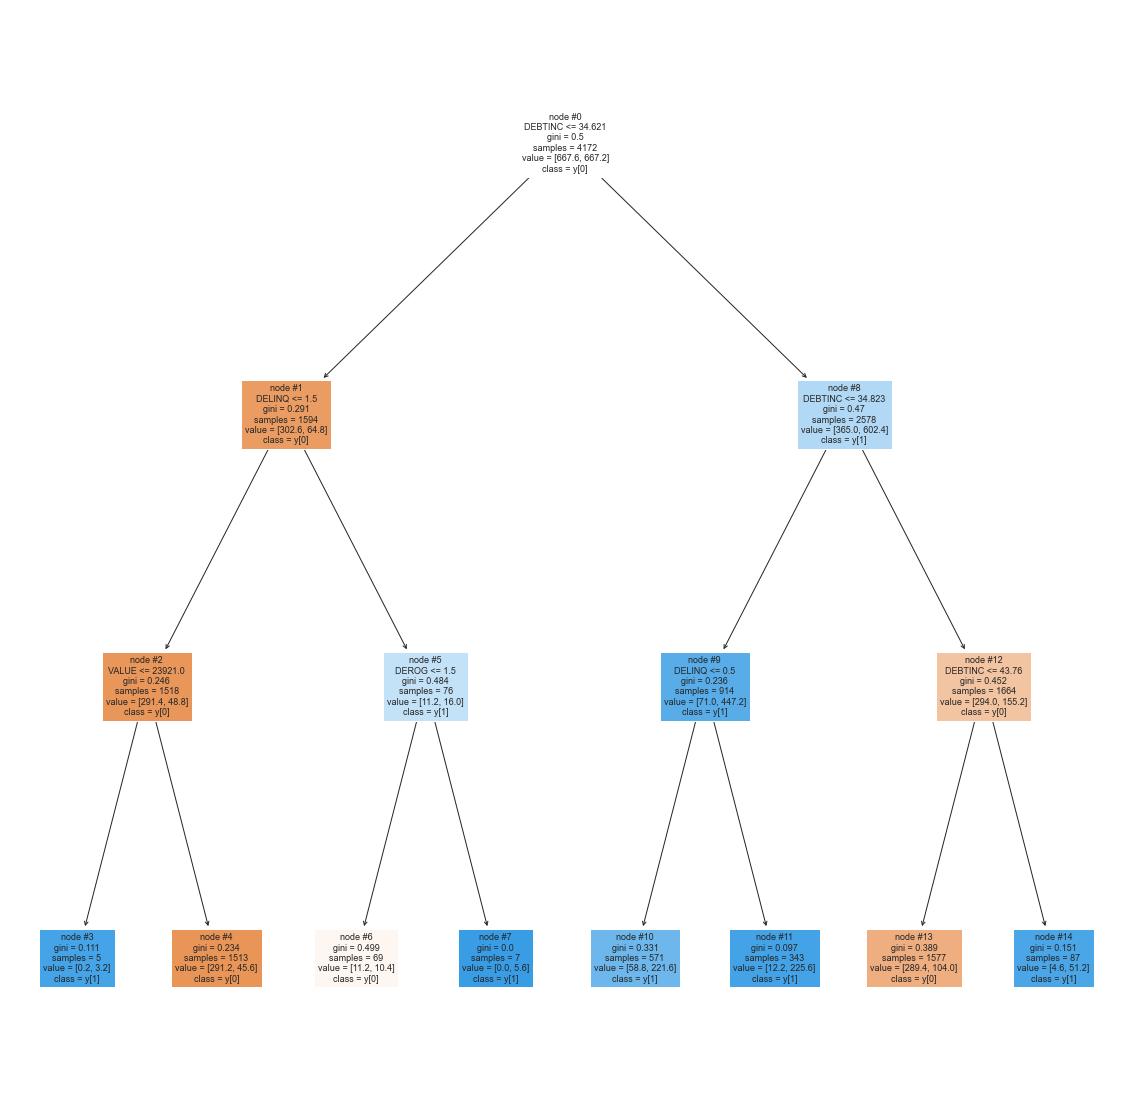

In [65]:
# Plot the decision  tree and analyze it to build the decision rule
features = list(X.columns)
plt.figure(figsize = (20, 20))
tree.plot_tree(tree_model, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)
plt.show()

#### Deduce the business rules apparent from the Decision Tree and write them down: _____

**Plot the feature importance of the tuned Decision Tree**

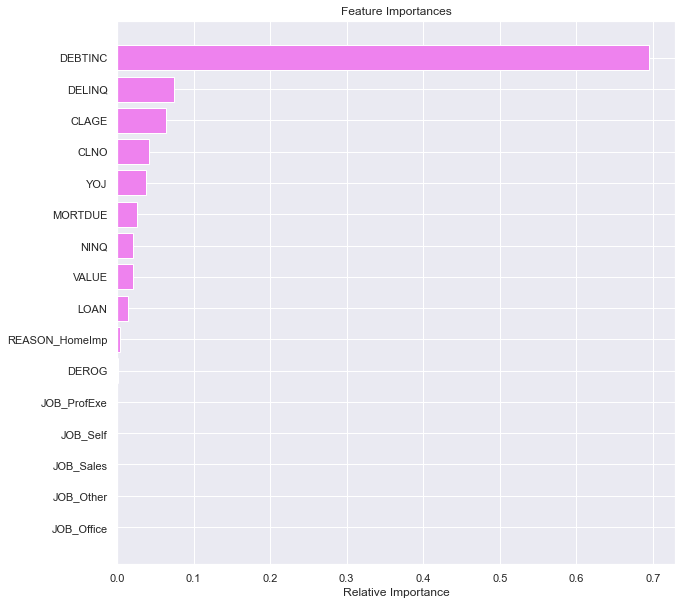

In [66]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize = (10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [67]:
# Defining Random forest CLassifier
rf_estimator = RandomForestClassifier(random_state = 7, criterion = "entropy")

# Fitting Random Forest model
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3338
           1       1.00      1.00      1.00       834

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



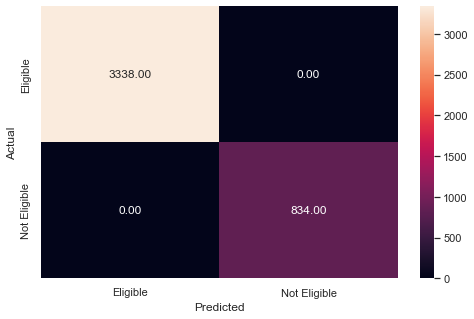

In [68]:
#Checking performance on the training data
y_pred_train4 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train4)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1433
           1       0.85      0.65      0.74       355

    accuracy                           0.91      1788
   macro avg       0.88      0.81      0.84      1788
weighted avg       0.90      0.91      0.90      1788



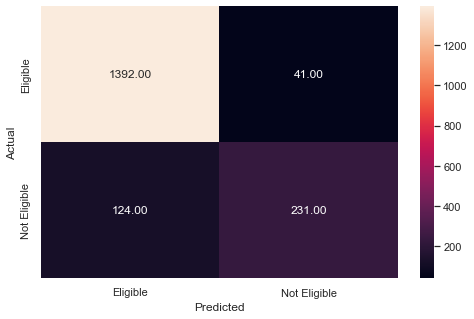

In [69]:
# Checking performance on the test data
y_pred_test4 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test4)

**Observations:**
* The model is performing well on the training data with accuracy of 100% and on the test data with aacuracy of 92%.
* The model is overfitting on the training data.

### **Build a Random Forest model with Class Weights**

In [70]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}
rf_estimator1 = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 7, criterion = "entropy")

# Fitting Random Forest model
rf_estimator1.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       random_state=7)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3338
           1       1.00      1.00      1.00       834

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



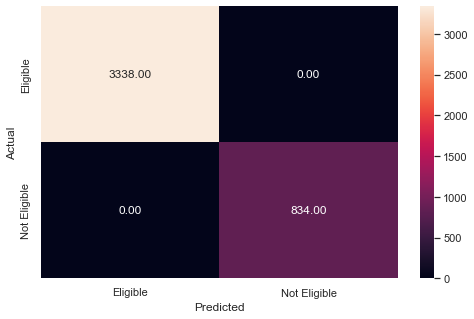

In [71]:
# Checking performance on the train data
y_pred_train5 = rf_estimator1.predict(X_train)

metrics_score(y_train, y_pred_train5)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1433
           1       0.85      0.63      0.72       355

    accuracy                           0.90      1788
   macro avg       0.88      0.80      0.83      1788
weighted avg       0.90      0.90      0.90      1788



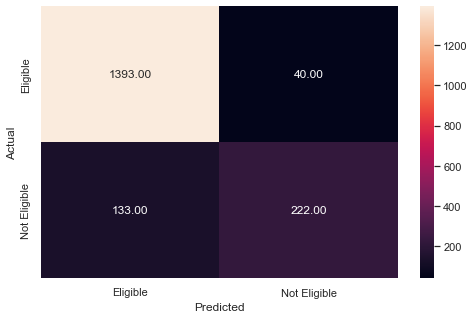

In [72]:
# Checking performance on the test data
y_pred_test5 = rf_estimator1.predict(X_test)

metrics_score(y_test, y_pred_test5)

**Observations:**
* Similar to the previous model this model is also overfitting on the training data with accuracy of 100%.

### **Tuning the Random Forest**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

You can learn more about Random Forest Hyperparameters from the link given below and try to tune them

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [73]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)
# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.2, 1: 0.8}]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

#fit the GridSearch on train dataset
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=7, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=20, n_estimators=120, random_state=7)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3338
           1       0.69      0.81      0.74       834

    accuracy                           0.89      4172
   macro avg       0.82      0.86      0.84      4172
weighted avg       0.90      0.89      0.89      4172



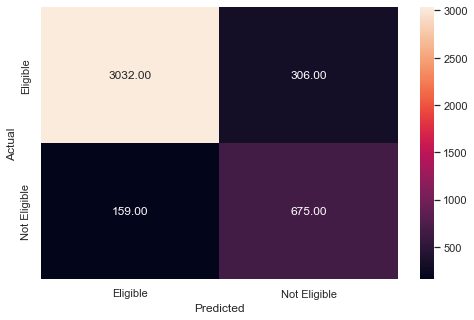

In [74]:
# Checking performance on the training data
y_pred_train6 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train6)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1433
           1       0.64      0.75      0.69       355

    accuracy                           0.87      1788
   macro avg       0.79      0.82      0.80      1788
weighted avg       0.88      0.87      0.87      1788



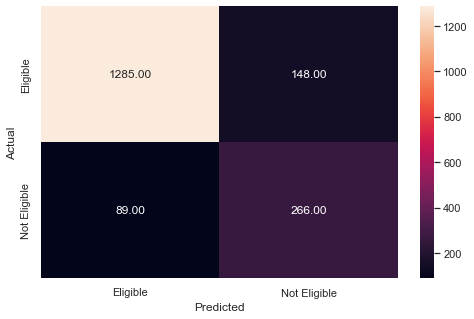

In [75]:
# Checking performace on test dataset
y_pred_test6 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test6)

**Observations:**
* The tuned random forest model is having a balanced perfomance on both the training and test data with accuracy of 88% on both.
* It has a better recall (73%) than the previous two models.

#### Plot the Feature importance of the tuned Random Forest

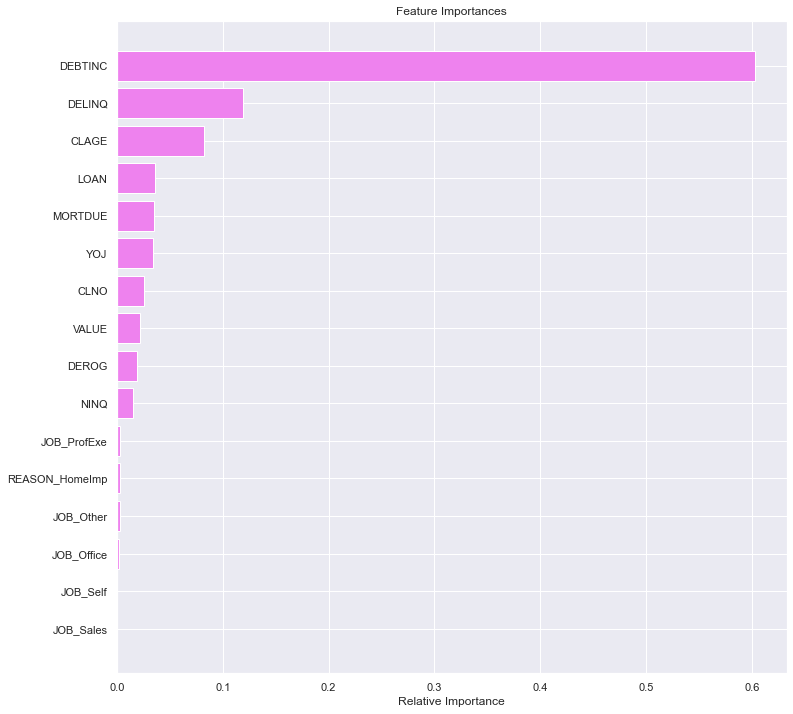

In [76]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset

importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)
plt.figure(figsize = (12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### **Comparing Model Performances**

In [77]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [78]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [79]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [80]:
# Make the list of all the model names 

models = [lg, d_tree, d_tree_tuned, rf_estimator, rf_estimator1, rf_estimator_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [81]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]

comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Tuned Decision Tree','Random Forest Classifier',
                                         'Random Forest Classifier w/weights','Tuned Random Forest Classifier'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Regression,0.800096,0.801454,0.000000,0.000000,0.000000,0.000000
1,Decision Tree,1.000000,0.855145,1.000000,0.560563,1.000000,0.658940
2,Tuned Decision Tree,0.853547,0.825503,0.884892,0.791549,0.588986,0.541426
3,Random Forest Classifier,1.000000,0.907718,1.000000,0.650704,1.000000,0.849265
4,Random Forest Classifier w/weights,1.000000,0.903244,1.000000,0.625352,1.000000,0.847328
5,Tuned Random Forest Classifier,0.888543,0.867450,0.809353,0.749296,0.688073,0.642512


**Insights:**
* The logistic regression model is performing very bad, this model can be omitted.
* Both the tuned decision tree and tuned random forest models are performing almost similar with accuracy of 85% and 88% respectively.
* The test recall for tuned decision tree and tuned random forest is 79% and 75% respectively. 